In [1]:
import json, yaml
from datetime import datetime
from dateutil import tz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

CONFIG_PATH = "../config/config.yaml"

In [2]:
with open('../newest_ts', 'r') as f:
    newest_ts = f.read()

data_path = f"../data/data_{newest_ts}.json"
with open(data_path, 'r') as f:
    data = json.load(f)

with open(CONFIG_PATH, "r") as stream:
    config = yaml.safe_load(stream)

TIME_ZONE = config['time_zone']
DATETIME_FORMAT = config['dt_format']

In [3]:
def ts2dt(ts, format=DATETIME_FORMAT):
    dt = (datetime.utcfromtimestamp(int(ts))
                    .replace(tzinfo=tz.tzutc())
                    # .astimezone(tz.tzlocal())
                    .astimezone(tz.gettz(TIME_ZONE)))
    return dt.strftime(format), dt

_, newest_dt = ts2dt(newest_ts)
print(f"Recent query happens at {newest_dt.strftime(DATETIME_FORMAT)} ({newest_dt.tzname()}).")

Recent query happens at 2021-08-23 03:46:11 (UTC).


In [4]:
def degrees_to_cardinal(d):
  dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
  ix = int(round(d / (360. / len(dirs))))
  return dirs[ix % len(dirs)]

In [5]:
data.keys()

dict_keys(['lat', 'lon', 'timezone', 'timezone_offset', 'current', 'hourly', 'daily'])

In [6]:
# data['current']

/tmp/ipykernel_1800/214104978.py:4: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  icon = plt.imread(f"http://openweathermap.org/img/wn/{current['weather'][0]['icon']}@2x.png")


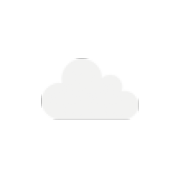

Today, sun rises at 22:03 and sets at 10:48.
Currently, the weather is Clouds (scattered clouds).
The UV index is 12.06, humidity is 69%.
The pressure is 1008 hPa, percentage of cloud cover is 26%
The wind comes from SW direction with a speed 4.66 m/s.


In [7]:
current = data['current']

fig, ax = plt.subplots(figsize=(3, 3))
icon = plt.imread(f"http://openweathermap.org/img/wn/{current['weather'][0]['icon']}@2x.png")
plt.imshow(icon)
ax.set_axis_off()
plt.show()

print(f"Today, sun rises at {ts2dt(current['sunrise'], '%H:%M')[0]} \
and sets at {ts2dt(current['sunset'], '%H:%M')[0]}.\n\
Currently, the weather is {current['weather'][0]['main']} ({current['weather'][0]['description']}).\n\
The UV index is {current['uvi']}, humidity is {current['humidity']}%.\n\
The pressure is {current['pressure']} hPa, percentage of cloud cover is {current['clouds']}%\n\
The wind comes from {degrees_to_cardinal(current['wind_deg'])} direction with a speed {current['wind_speed']} m/s.")

In [8]:
df_hourly = pd.DataFrame(data['hourly'])
df_daily = pd.DataFrame(data['daily'])

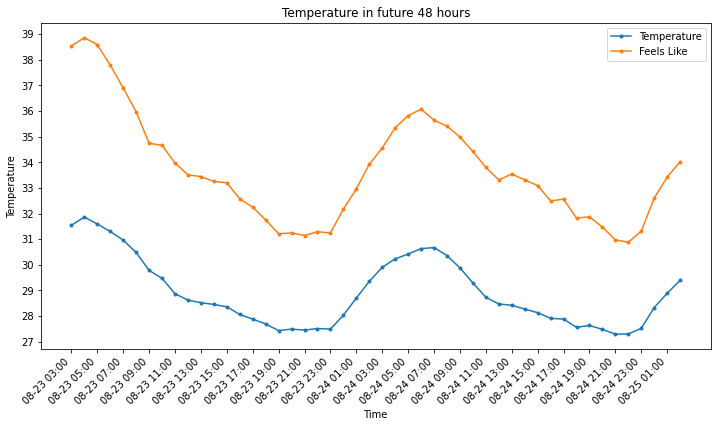

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_hourly.temp, '.-', label='Temperature')
plt.plot(df_hourly.feels_like, '.-', label='Feels Like')
ax.set(title='Temperature in future 48 hours', xlabel='Time', ylabel='Temperature')
ax.set_xticks(list(range(0, len(df_hourly), 2)))
ax.set_xticklabels([ts2dt(ts, '%m-%d %H:%M')[0] for i, ts in enumerate(df_hourly.dt) if i%2==0], 
                   rotation=45, ha="right")
ax.locator_params(nbins=15, axis='y')
plt.legend()
plt.show()

In [10]:
df_hourly.head()

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather,pop,rain
0,1629687600,31.54,38.54,1008,69,25.16,10.47,26,10000,3.79,218,4.50,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.50,NaN
1,1629691200,31.86,38.86,1008,69,25.46,12.06,26,10000,4.66,219,4.81,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.49,NaN
2,1629694800,31.59,38.59,1008,69,25.20,11.88,29,10000,4.48,219,4.48,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.41,NaN
3,1629698400,31.30,37.79,1008,68,24.68,9.88,36,10000,4.33,207,4.33,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.46,NaN
4,1629702000,30.96,36.90,1007,68,24.36,6.78,70,10000,4.00,201,4.19,"[{'id': 803, 'main': 'Clouds', 'description': ...",0.05,NaN
